# Libaries

In [16]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.6/766.6 MB 28.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 34.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 208.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 244.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 24.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 58.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 75.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 32.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 33.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.1/150.1 MB 38.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 188.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 225.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 177.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 157.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 186.7 MB/s eta 0:00:00


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# Extract data

In [ ]:
# import data into numpy array 
# reference: https://stackoverflow.com/questions/52164047/elegant-way-to-process-and-skip-first-lines-containing-metadata-when-reading
fname = 'PulseDrain_GateDC_record_1.txt'
myarray = np.loadtxt(fname, skiprows=1) # skiprows = 1 to skip the meta data line (i.e column names)

In [ ]:
# check the imported data
print(type(myarray), myarray.shape,
     myarray[0:10, 0]
     )

In [ ]:
# Unpack the data
time_axis = myarray[:, 0]
vg_axis = myarray[:, 1]
ig_axis = myarray[:, 2]
id_axis = myarray[:, 3]

# Pack data together for plotting (using Dataset, Dataloader from torch)

reference:

[1] https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [40]:
pack_data = [vg_axis, id_axis, ig_axis]
pack_data_names = ['vg', 'id', 'ig']
print(pack_data[0].shape)

(1174,)


In [38]:
class CustomDataset(Dataset): # a new class inherit from the Dataset class from torch
    def __init__(self, list_data, list_names):
        self.list_data = list_data
        self.list_names = list_names

    def __len__(self):
        return len(self.list_data)

    def __getitem__(self, idx):
        data = self.list_data[idx]
        label = self.list_names[idx]
        return data, label

In [42]:
# use inherited-Dataset
new_pack_data = CustomDataset(pack_data, pack_data_names)
data_1, label_1 = new_pack_data[0]
print(data_1.shape,
      len(new_pack_data),
      label_1
)

(1174,) 3 vg


In [60]:
# Define a dataloader for the packed data
item_loader = DataLoader(new_pack_data, batch_size=1, shuffle=False)
iter_item_loader = iter(item_loader) # for looping through it later

In [ ]:
# Check the customed data loader, access using iter function
# reference: https://discuss.pytorch.org/t/iterating-through-a-dataloader-object/25437
# # IMPORTANT:
# after iterating through the every element of the defined iter object,
# the iter object will be empty (iter object acts like a stack object with pop function).
# Therefore, to use iter object again in another the loop,
# we must create the iter object from the loader object again.
# For example, the iter_item_loader is always created at the beginning of the for loop,
# so that every time after finishing the for loop, we could rerun this cell, and see the information.
# Without the iter_item_loader, the second time running on the iter object, there is nothing printed on the screen.

iter_item_loader = iter(item_loader) # for looping through it later
for i in iter_item_loader:
    # print(i)
    data, label = i

    # convert torch type to numpy type
    print(type(data),
          data[0:10]
          )
    data_np = data[0:10].numpy()
    print(type(data_np),
          data_np
          )

    # convert tuple type to string
    print(label, type(label))
    str_label = str(label)
    print(str_label, type(str_label))

<class 'torch.Tensor'> tensor([[-0.8001, -0.8001, -0.8001,  ...,  0.1000,  0.1000,  0.1000]],
       dtype=torch.float64)
<class 'numpy.ndarray'> [[-0.800054  -0.800053  -0.800053  ...  0.0999763  0.0999765  0.0999782]]
('vg',) <class 'tuple'>
('vg',) <class 'str'>
<class 'torch.Tensor'> tensor([[4.3263e-06, 6.8724e-07, 5.4203e-07,  ..., 2.3221e-08, 2.3127e-08,
         2.2704e-08]], dtype=torch.float64)
<class 'numpy.ndarray'> [[4.32633e-06 6.87236e-07 5.42035e-07 ... 2.32214e-08 2.31274e-08
  2.27044e-08]]
('id',) <class 'tuple'>
('id',) <class 'str'>
<class 'torch.Tensor'> tensor([[6.5872e-05, 6.6489e-05, 6.7162e-05,  ..., 1.5317e-05, 1.5316e-05,
         1.5314e-05]], dtype=torch.float64)
<class 'numpy.ndarray'> [[6.58716e-05 6.64891e-05 6.71622e-05 ... 1.53172e-05 1.53164e-05
  1.53138e-05]]
('ig',) <class 'tuple'>
('ig',) <class 'str'>


# Plot

## Plot individual figure

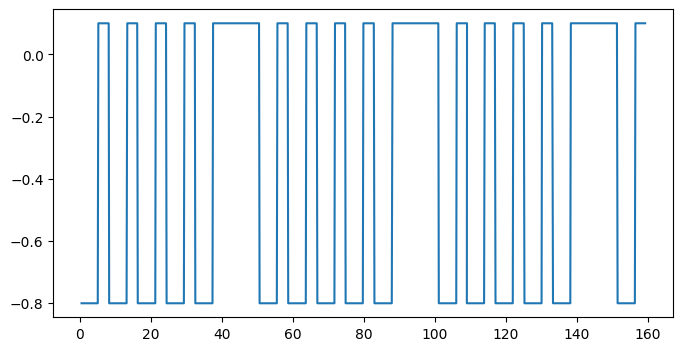

In [37]:
plt.figure(figsize=(8, 4))
plt.plot(time_axis, vg_axis)
plt.show()

## Plot all figures together as subfigures

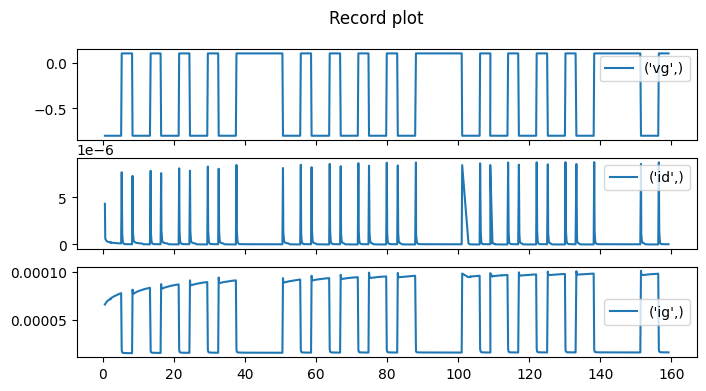

In [76]:
num_figs = 3
iter_item_loader = iter(item_loader) # for looping through it later

fig, axs = plt.subplots(num_figs,  figsize=(8, 4), sharex=True) #sharex=True, sharey=True,
fig.suptitle('Record plot')
idx = 0 
for item in iter_item_loader:
    data_i, label_i = item
    axs[idx].plot(time_axis, data_i.numpy()[0,:], label =str(label_i))
    # axs[idx].set_ylim(-1, neuron_index_num+1)
    axs[idx].legend()
    idx += 1